## 1. Load the dataset

### Import all the necessary libararies and Load the file to a dataframe

In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\sushm\Downloads\Project_1_python\Project_1_python\dataset_adult\adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(file_path, sep=',\s', engine='python', names=columns)
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Output the structure of the dataset

### Print the metadata and structure of the dataset

In [2]:
print("=== Dataset Structure Overview ===\n")
print("1. DataFrame Information:\n")
print(df.info()) 

print("\n2. Summary Statistics of Numerical Columns:\n")
print(df.describe()) 

print("\n3. Sample Records (First 5 Rows):\n")
print(df.head())

=== Dataset Structure Overview ===

1. DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

2. Summary Statistics of

## 3. Clean the dataset, handle the missing values and encode the categorical values

### Print the values with '?'

In [3]:
# Check if any column has the '?' character
df[df.isin(['?']).any(axis=1)]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


### Replace '?' with Na values

In [4]:
# Replace '?' with Na across the entire DataFrame
df.replace('?', pd.NA, inplace=True)

# See if any '?' still exists
df[df.isin(['?']).any(axis=1)]

# Display rows where any column has Na
nan_rows = df[df.isna().any(axis=1)]

# Display the first few rows with Na values
print(nan_rows.head())


    age workclass  fnlwgt     education  education-num         marital-status  \
14   40   Private  121772     Assoc-voc             11     Married-civ-spouse   
27   54      <NA>  180211  Some-college             10     Married-civ-spouse   
38   31   Private   84154  Some-college             10     Married-civ-spouse   
51   18   Private  226956       HS-grad              9          Never-married   
61   32      <NA>  293936       7th-8th              4  Married-spouse-absent   

       occupation   relationship                race     sex  capital-gain  \
14   Craft-repair        Husband  Asian-Pac-Islander    Male             0   
27           <NA>        Husband  Asian-Pac-Islander    Male             0   
38          Sales        Husband               White    Male             0   
51  Other-service      Own-child               White  Female             0   
61           <NA>  Not-in-family               White    Male             0   

    capital-loss  hours-per-week native-coun

### Print the missing values

In [6]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


### Remove rows with missing values

In [7]:
# Remove rows with missing values
df.dropna(inplace=True)
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Identify categorical columns

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


### Encode categorical variables using LabelEncoder()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode each categorical column
labelencoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = labelencoder.fit_transform(df[col])


### Print cleaned and encoded Data Frame

In [10]:
print("Missing values after handling:\n", df.isnull().sum())

print("\nSample of the cleaned dataset:\n", df.head())

Missing values after handling:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Sample of the cleaned dataset:
    age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          5   77516          9             13               4   
1   50          4   83311          9             13               2   
2   38          2  215646         11              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0   

## 4. Explore the data to understand better, for example, draw a bar plot to identify the distribution of the population in the dataset by age, followed by distribution of income by gender.

### 1. Distribution of the Population by Age

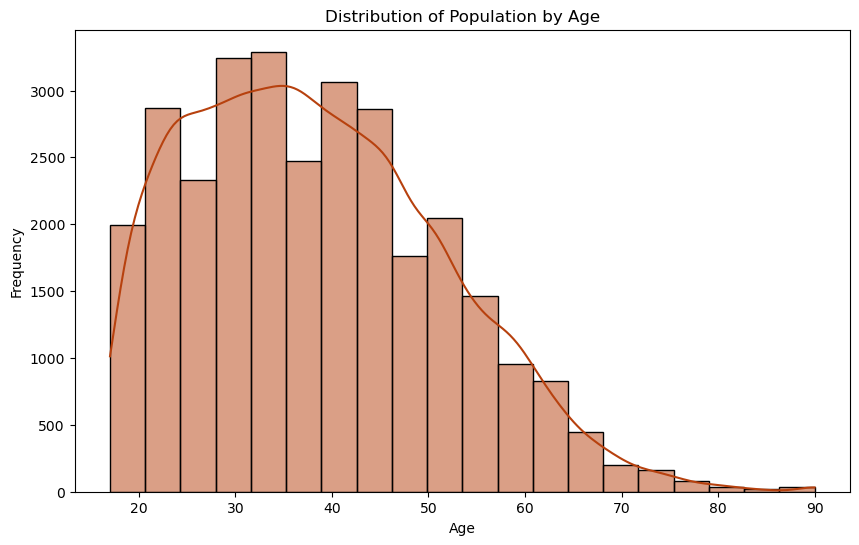

In [11]:
#1. Distribution of the Population by Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='#B7410E')
plt.title('Distribution of Population by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




### 2. Distribution of income by gender

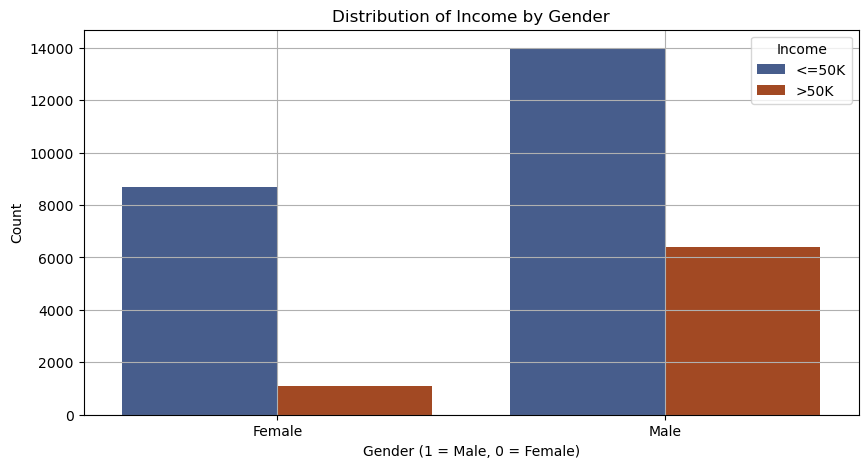

In [12]:
# Plot the distribution of income by gende
plt.figure(figsize=(10, 5))

custom_palette = ['#3B5998', '#B7410E'] 
# Create a count plot using the 'Gender' column
sns.countplot(data=df, x='sex', hue='income', palette=custom_palette)

plt.title('Distribution of Income by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Set labels for x-axis

plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.grid()
# Display the plot
plt.show()




### 3. Age vs. Income Distribution

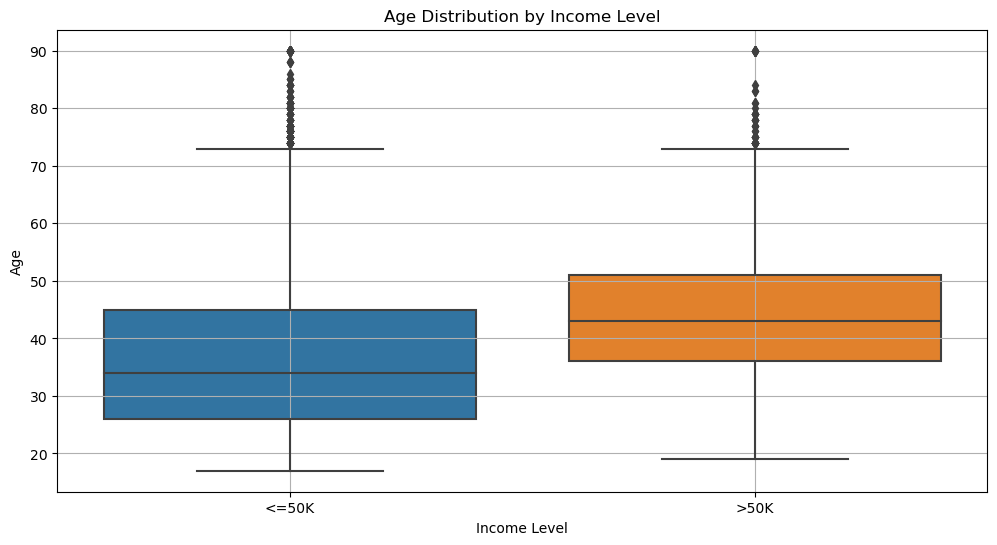

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age vs. Income Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=df)

# Customize the plot title and labels
plt.title('Age Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age')

# Set x-ticks with descriptive labels
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])
plt.grid()
plt.show()


### 4. Hours worked per week by income level

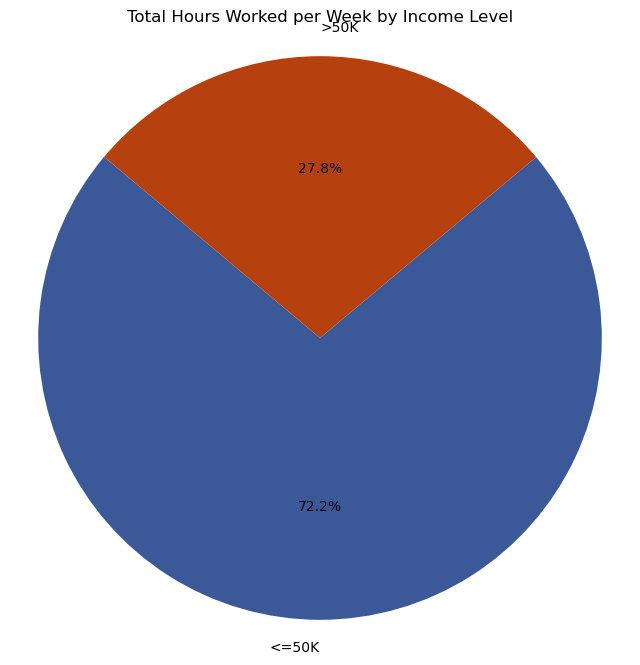

In [14]:
import matplotlib.pyplot as plt

# Calculate total hours worked per week by income level
hours_by_income = df.groupby('income')['hours-per-week'].sum()

# Create labels for the pie chart
labels = ['<=50K', '>50K']

plt.figure(figsize=(8, 8))
plt.pie(hours_by_income, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#3B5998','#B7410E'])
plt.title('Total Hours Worked per Week by Income Level')
plt.axis('equal')
plt.show()




## 5. Apply predictive modeling to the data to predict whether an individual earns more than 50k a yera

### Load the test dataset

In [15]:
# Load test dataset
test_data_path = r'C:\Users\sushm\Downloads\Project_1_python\Project_1_python\dataset_adult\adult.test'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df_test = pd.read_csv(test_data_path, header=None, names=columns, skiprows=1, skipinitialspace=True)

df_test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Preprocess the test data set by handling '?' values

In [16]:
# Check if any column has the '?' character
df_test[df_test.isin(['?']).any(axis=1)]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K.
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,21,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
16239,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
16251,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.
16265,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,?,>50K.


In [17]:
# Replace '?' with Na across the entire DataFrame
df_test.replace('?', pd.NA, inplace=True)

# Display rows where any column has Na
na_rows = df_test[df_test.isna().any(axis=1)]

# Display the first few rows with Na values
print(na_rows.head())

    age workclass  fnlwgt     education  education-num      marital-status  \
4    18      <NA>  103497  Some-college             10       Never-married   
6    29      <NA>  227026       HS-grad              9       Never-married   
13   58      <NA>  299831       HS-grad              9  Married-civ-spouse   
19   40   Private   85019     Doctorate             16  Married-civ-spouse   
22   72      <NA>  132015       7th-8th              4            Divorced   

        occupation   relationship                race     sex  capital-gain  \
4             <NA>      Own-child               White  Female             0   
6             <NA>      Unmarried               Black    Male             0   
13            <NA>        Husband               White    Male             0   
19  Prof-specialty        Husband  Asian-Pac-Islander    Male             0   
22            <NA>  Not-in-family               White  Female             0   

    capital-loss  hours-per-week native-country  income 

### Preprocess the test data set by handling missing values

In [18]:
# Display the rows with null vales
print("Missing values before handling:\n", df_test.isnull().sum())

# Remove rows with missing values
df_test.dropna(inplace=True)
print("Missing values after handling:\n", df_test.isnull().sum())


Missing values before handling:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
Missing values after handling:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Show all the categorical columns and Encode categorical columns using LabelEncoder()

In [19]:
# Identify categorical columns
categorical_cols = df_test.select_dtypes(include=['object']).columns
print(categorical_cols)


# Encode each categorical column
labelencoder = LabelEncoder()
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = labelencoder.fit_transform(df_test[col])
    
df_test.head(5)


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


### Applying a predictive modeling method RandomForestClassifier for predictions

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features and target for the training set
X_train = df.drop('income', axis=1)  # All columns except 'income'
y_train = df['income']  # Target variable

# Define features and target for the test set
X_test = df_test.drop('income', axis=1)  # All columns except 'income'
y_test = df_test['income']  # Target variable

# Display the shapes of training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

# Create the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42,min_samples_split=5, min_samples_leaf=2)

# Train the classifier using the training dataset
classifier.fit(X_train, y_train)

# Make predictions on the separate test set
y_pred = classifier.predict(X_test)

# Display the first 10 predictions
print("\nFirst 10 Predictions:\n", y_pred[:10])




Training Features Shape: (30162, 14)
Testing Features Shape: (15060, 14)
Training Target Shape: (30162,)
Testing Target Shape: (15060,)

First 10 Predictions:
 [0 0 0 1 0 1 0 0 1 0]


## Calculate accuracy

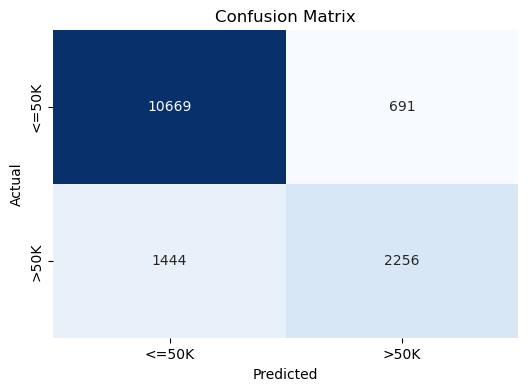

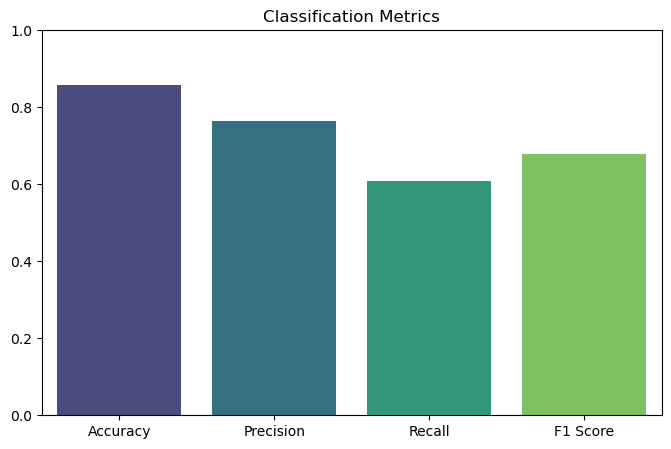

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 4. Plot bar chart of the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0, 1)  # Limit y-axis to between 0 and 1
plt.title('Classification Metrics')
plt.show()


In [57]:
# Display evaluation metrics for the separate test dataset
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on separate test set: {accuracy * 100:.2f}%")


Confusion Matrix:
 [[10669   691]
 [ 1444  2256]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.77      0.79     15060
weighted avg       0.85      0.86      0.85     15060


Accuracy on separate test set: 85.82%
